In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from matplotlib.dates import DateFormatter
from datetime import datetime as dt

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df = pd.read_csv('Customer_Data.csv')

In [ ]:
df

,Unnamed: 0,Gender,Age,Annual Income,Total Spending,Interests
0,0,male,22.0,16.0,512.50,Cooking
1,1,male,34.0,12.0,358.75,Exercise
2,2,male,64.0,13.0,153.75,Travel
3,3,male,70.0,13.0,717.50,Crafts
4,4,female,58.0,22.0,820.00,Travel
...,...,...,...,...,...,...
1595,1595,male,33.0,88.0,3228.75,Entertainment
1596,1596,male,33.0,81.0,3741.25,Technology
1597,1597,female,34.0,70.0,3997.50,Reading
1598,1598,female,25.0,39.0,3433.75,Entertainment


In [ ]:
df.drop ('Unnamed: 0', axis=1, inplace=True)
df.dropna(axis=0, how='all', inplace= True)

In [ ]:
df['Interests'].unique()

array(['Cooking', 'Exercise', 'Travel', 'Crafts', 'Reading',
       'Strategic games', 'Photography', 'Hiking', 'Gaming', 'Camping',
       'Entertainment', 'Sports', 'Music', 'Automobiles', 'Yoga', 'Art',
       'Technology', 'Pets', 'Gardening'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# dfle = df 
# dfle['Interests Code'] = le.fit_transform(dfle['Interests'])
# df=dfle

In [ ]:
df

,Gender,Age,Annual Income,Total Spending,Interests
0,male,22.0,16.0,512.50,Cooking
1,male,34.0,12.0,358.75,Exercise
2,male,64.0,13.0,153.75,Travel
3,male,70.0,13.0,717.50,Crafts
4,female,58.0,22.0,820.00,Travel
...,...,...,...,...,...
1595,male,33.0,88.0,3228.75,Entertainment
1596,male,33.0,81.0,3741.25,Technology
1597,female,34.0,70.0,3997.50,Reading
1598,female,25.0,39.0,3433.75,Entertainment


### TASK is to write a classifier which can correctly predict the label of a given article. You will need to implement some more sophisticated methods of feature generation, classification, or both. For instance, you might experiment with various techniques to combat over fitting, or you might use a dimensionality reduction technique to generate better features. 


### E.D.A 

In [ ]:
df.corr()

,Age,Annual Income,Total Spending
Age,1.000000,-0.015438,-0.318733
Annual Income,-0.015438,1.000000,0.025457
Total Spending,-0.318733,0.025457,1.000000


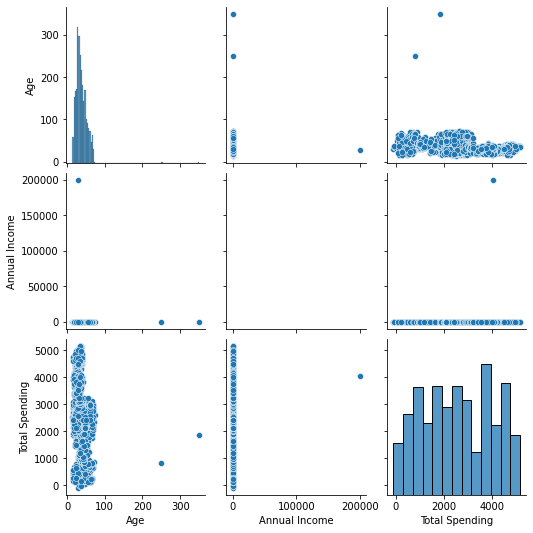

In [ ]:
sns.pairplot(df)

- There seems to be couple of outliers so we will drop them

In [ ]:
df.drop( df[df['Age'] > 100].index, inplace = True)


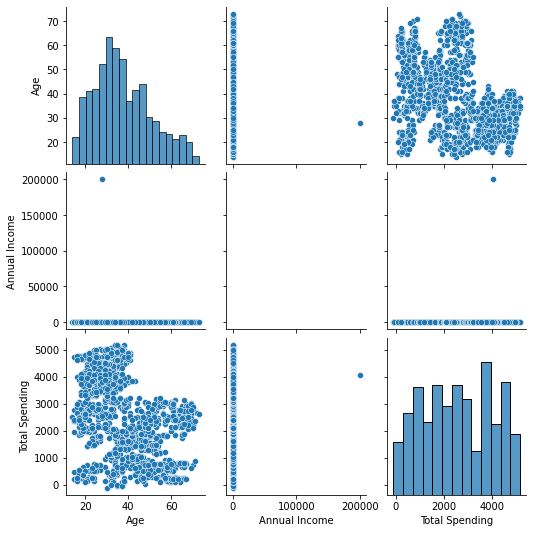

In [ ]:
sns.pairplot(df)

### Dropping outliers

In [ ]:
df['Annual Income'].max()

200000.0

In [ ]:
df.drop( df[df['Annual Income'] >= 200000].index, inplace = True) 

In [ ]:
df.drop( df[df['Annual Income'] <= 0].index, inplace = True)

df.to_excel('Clean Data.xlsx')

In [ ]:
df.to_excel('Clean Data.xlsx', index = False)

In [ ]:
df_clean = pd.read_excel('Clean Data.xlsx')

In [ ]:
df_clean['Annual Income'].max()

158.0

In [ ]:
df_clean['Age'].min()

14.0

In [ ]:
df_clean.isna().sum()

Gender            0
Age               2
Annual Income     4
Total Spending    0
Interests         0
dtype: int64

In [ ]:
df['Annual Income'].max()

158.0

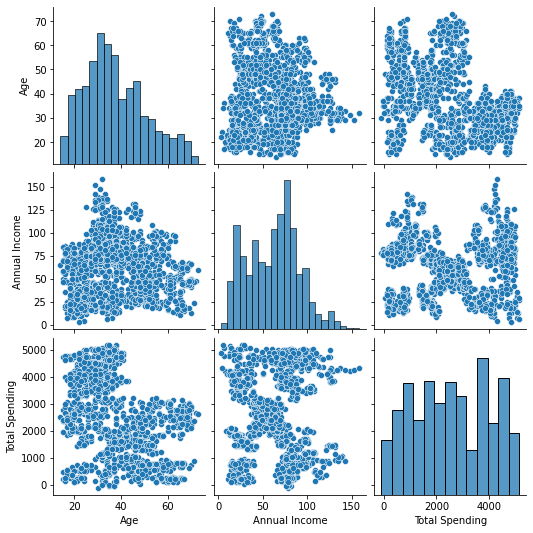

In [ ]:
sns.pairplot(df)

### Visualizations  

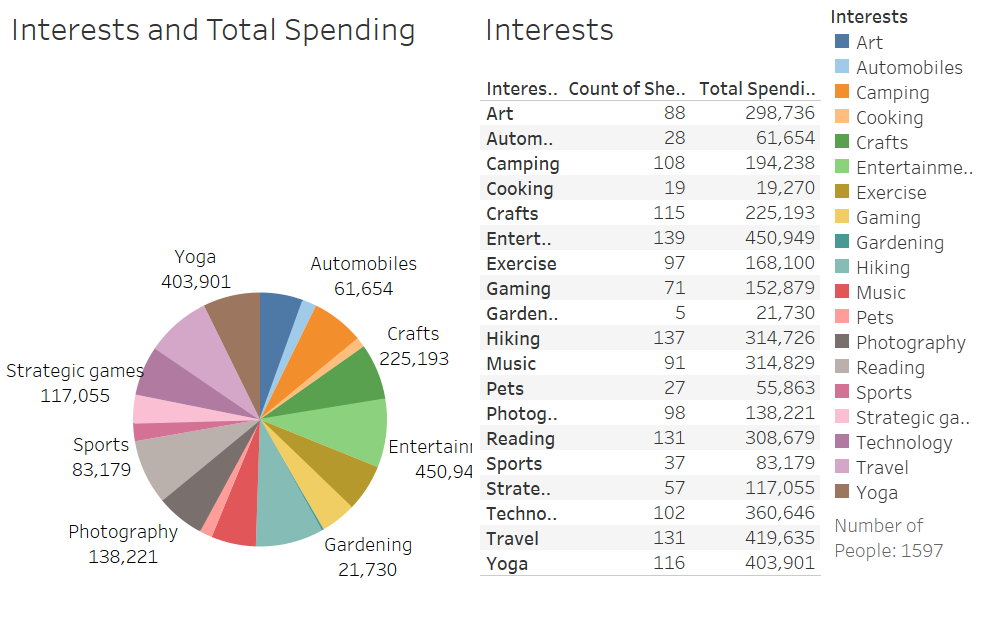

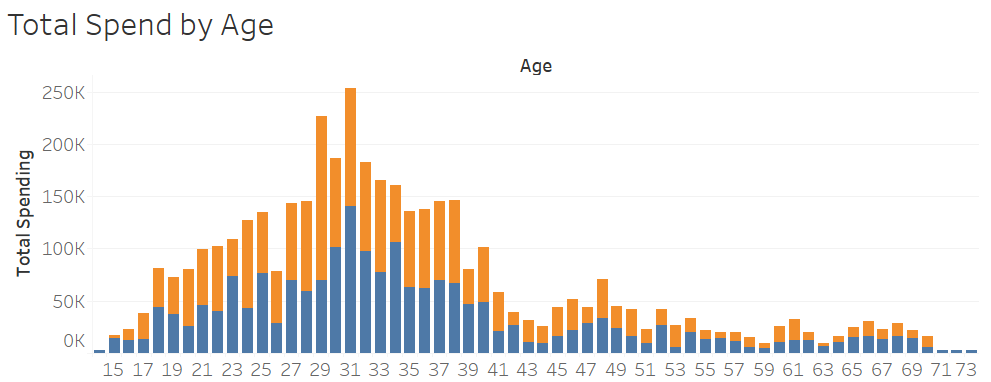

- Blue: Male 
- Organce: Female

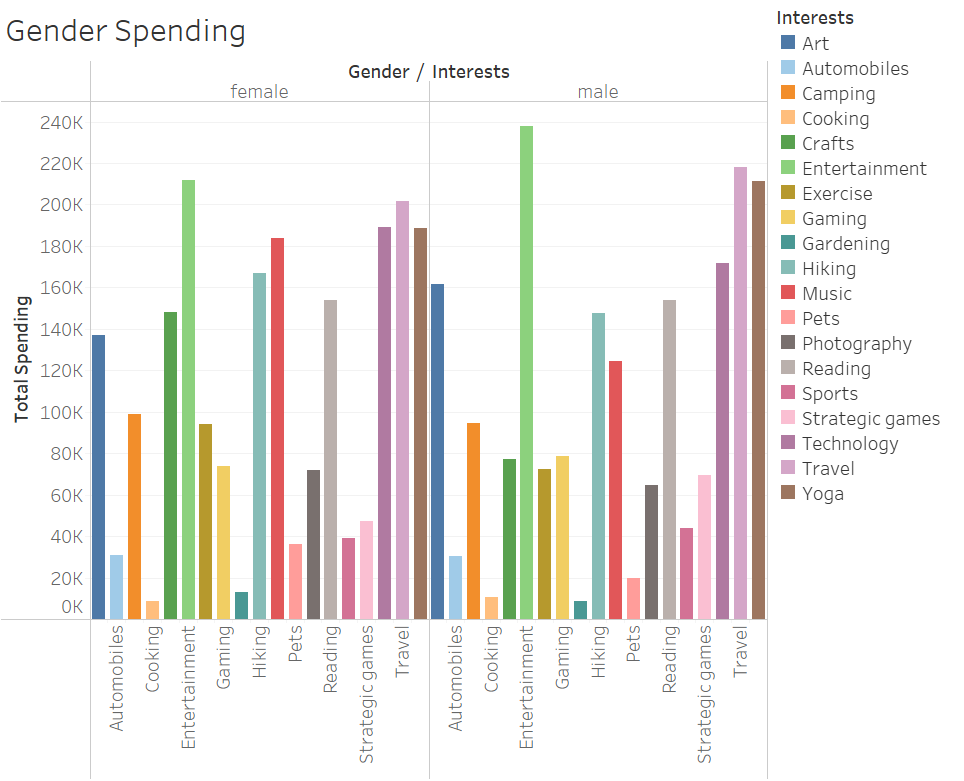

### Dropping outliers

In [ ]:
df.drop( df[df['Annual Income'] >= 200000].index, inplace = True) 

In [ ]:
df.drop( df[df['Annual Income'] <= 0].index, inplace = True)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.isna().sum()

Gender            0
Age               2
Annual Income     4
Total Spending    0
Interests         0
dtype: int64

In [ ]:
df2 = df.dropna().reset_index(drop=True)
df2.isna().sum()

Gender            0
Age               0
Annual Income     0
Total Spending    0
Interests         0
dtype: int64

In [ ]:
df3 = pd.get_dummies(df2, columns=['Gender','Interests'])
df3.head()

,Age,Annual Income,Total Spending,Gender_female,Gender_male,Interests_Art,Interests_Automobiles,Interests_Camping,Interests_Cooking,Interests_Crafts,Interests_Entertainment,Interests_Exercise,Interests_Gaming,Interests_Gardening,Interests_Hiking,Interests_Music,Interests_Pets,Interests_Photography,Interests_Reading,Interests_Sports,Interests_Strategic games,Interests_Technology,Interests_Travel,Interests_Yoga
0,22.0,16.0,512.50,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34.0,12.0,358.75,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,64.0,13.0,153.75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70.0,13.0,717.50,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,58.0,22.0,820.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#### Ali's Code
# km = KMeans(n_clusters=3)
# y_predicted = km.fit_predict(df[['Age','Interests Code']])
# y_predicted

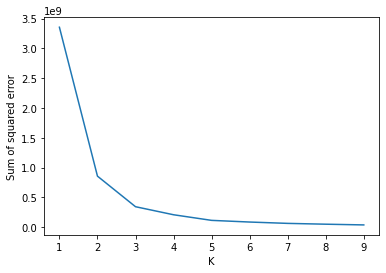

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df3)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
model = KMeans(n_clusters=3)
model.fit(df3)
clusters = model.predict(df3)

In [ ]:
clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
df2['Cluster'] = clusters

In [ ]:
df2

,Gender,Age,Annual Income,Total Spending,Interests,Cluster
0,male,22.0,16.0,512.50,Cooking,0
1,male,34.0,12.0,358.75,Exercise,0
2,male,64.0,13.0,153.75,Travel,0
3,male,70.0,13.0,717.50,Crafts,0
4,female,58.0,22.0,820.00,Travel,0
...,...,...,...,...,...,...
1584,male,33.0,88.0,3228.75,Entertainment,2
1585,male,33.0,81.0,3741.25,Technology,1
1586,female,34.0,70.0,3997.50,Reading,1
1587,female,25.0,39.0,3433.75,Entertainment,1


In [ ]:
df2.to_excel('Data With Clusters.xlsx', index = False)

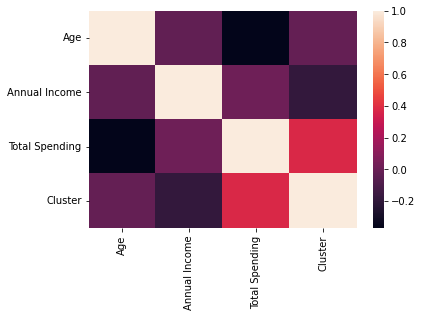

In [ ]:
sns.heatmap(df2.corr())

In [ ]:
df2.corr()

,Age,Annual Income,Total Spending,Cluster
Age,1.000000,-0.024847,-0.372152,-0.016636
Annual Income,-0.024847,1.000000,0.016262,-0.185920
Total Spending,-0.372152,0.016262,1.000000,0.376216
Cluster,-0.016636,-0.185920,0.376216,1.000000


- We observed that the clusters are higly correlated with total spending
-

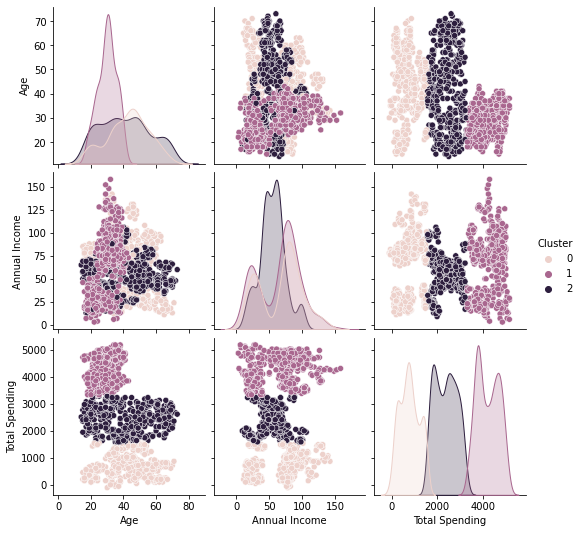

In [ ]:
sns.pairplot(df2, hue = 'Cluster')

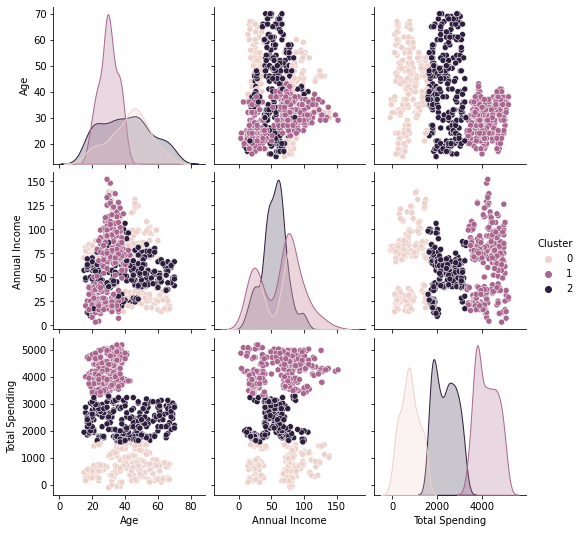

In [ ]:
sns.pairplot(df2[df2['Gender'] == 'female'], hue = 'Cluster')

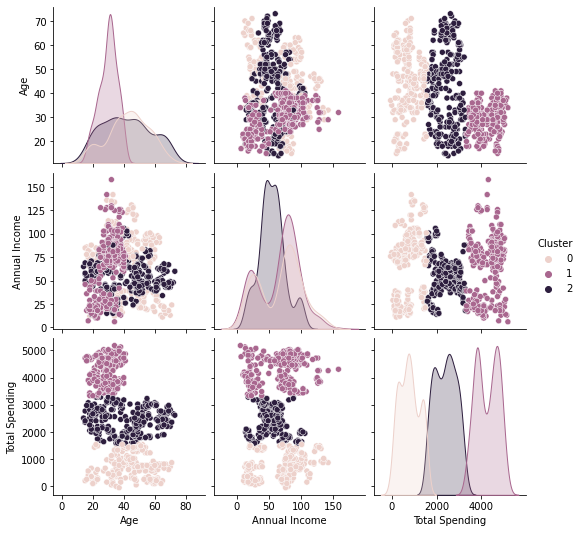

In [ ]:
sns.pairplot(df2[df2['Gender'] == 'male'], hue = 'Cluster')

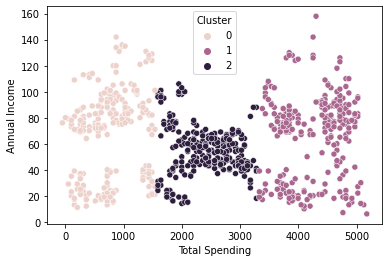

In [ ]:
sns.scatterplot(x=df2[df2['Gender'] == 'male']['Total Spending'],y=df2[df2['Gender'] == 'male']['Annual Income'], data=df2, hue=df2['Cluster'])

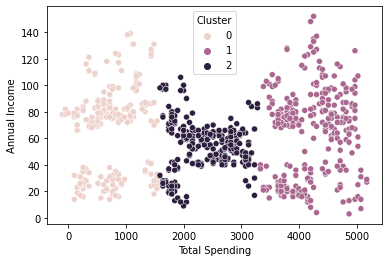

In [ ]:
sns.scatterplot(x=df2[df2['Gender'] == 'female']['Total Spending'],y=df2[df2['Gender'] == 'female']['Annual Income'], data=df2, hue=df2['Cluster'])

In [ ]:
df2.to_excel('Clustered Data.xlsx', index = False)